# Naive Bayes Classification
## By Giriraj Vaishnav

## 1. Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

## 2. Reading the csv file

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## 3. Divide the data into"Attributes" and "labels"

In [4]:
X = df.iloc[:, [1, 2, 3]].values

y = df.iloc[:, -1].values

## 4. Label Encoding for Gender

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

## 5. Splitting the data into train and test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((280, 3), (120, 3))

## 6. Feature Scaling

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 7. Create a Model and Train it

In [8]:
%%time
classifier = GaussianNB()

classifier.fit(X_train, y_train)

Wall time: 67 ms


GaussianNB()

## 8. Evaluating the Model

In [9]:
print("\nPrediction Probability : \n",classifier.predict_proba(X_test))

print("\nPrediction : ",classifier.predict(X_test))

print("\nScore : ",classifier.score(X_test, y_test))


Prediction Probability : 
 [[0.49168487 0.50831513]
 [0.03529242 0.96470758]
 [0.96822252 0.03177748]
 [0.19348303 0.80651697]
 [0.95656559 0.04343441]
 [0.95089091 0.04910909]
 [0.13368316 0.86631684]
 [0.92717604 0.07282396]
 [0.74426022 0.25573978]
 [0.7217969  0.2782031 ]
 [0.88835284 0.11164716]
 [0.23175557 0.76824443]
 [0.98502033 0.01497967]
 [0.98731368 0.01268632]
 [0.91258834 0.08741166]
 [0.5949539  0.4050461 ]
 [0.27824734 0.72175266]
 [0.46364161 0.53635839]
 [0.84288887 0.15711113]
 [0.15121053 0.84878947]
 [0.98448578 0.01551422]
 [0.9416193  0.0583807 ]
 [0.48094468 0.51905532]
 [0.05427914 0.94572086]
 [0.98921819 0.01078181]
 [0.29604802 0.70395198]
 [0.63150649 0.36849351]
 [0.88246693 0.11753307]
 [0.00824041 0.99175959]
 [0.9884276  0.0115724 ]
 [0.56261024 0.43738976]
 [0.98999353 0.01000647]
 [0.05804654 0.94195346]
 [0.95143295 0.04856705]
 [0.39358165 0.60641835]
 [0.87534295 0.12465705]
 [0.88071253 0.11928747]
 [0.82507189 0.17492811]
 [0.97647002 0.0235299

## 9. Print Confusion Matrix

In [10]:
print("\nConfusion Matrix : \n",confusion_matrix(y_test, classifier.predict(X_test)))


Confusion Matrix : 
 [[71  2]
 [ 9 38]]


## 10. Plot Confusion Matrix

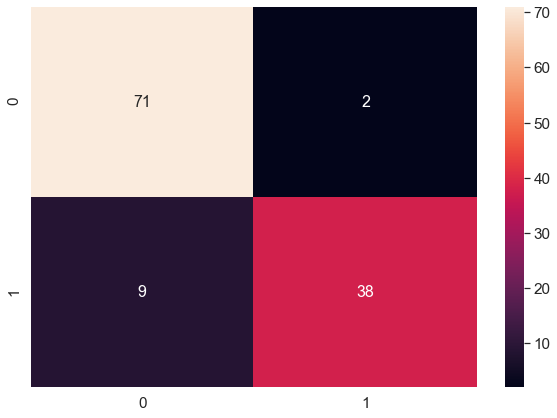

In [11]:
cm = confusion_matrix(y_test, classifier.predict(X_test))

df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

## 11. Print Classification Report

In [12]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        73
           1       0.95      0.81      0.87        47

    accuracy                           0.91       120
   macro avg       0.92      0.89      0.90       120
weighted avg       0.91      0.91      0.91       120

